In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

**Each review is encoded as a list of word indexes (integers)**, it means that each movie review in the IMDB reviews dataset has been converted into a sequence of integers, where each integer represents the index of a word in a predefined dictionary. This process is also known as "tokenization" where each word in the review is assigned a unique integer identifier.

For example, consider the following sentence:

"This movie was great, I really enjoyed it!"

To encode this sentence as a list of word indexes, we would first need to tokenize it by splitting it into individual words and assigning each word a unique integer identifier:

{"This": 1, "movie": 2, "was": 3, "great": 4, "I": 5, "really": 6, "enjoyed": 7, "it": 8}

Then, we would replace each word in the original sentence with its corresponding integer identifier to create a list of word indexes:

[1, 2, 3, 4, 5, 6, 7, 8]

This list represents the encoded version of the original sentence and can be used as input to a neural network for sentiment analysis. The IMDB reviews dataset contains 25,000 such encoded reviews where each review is represented as a sequence of integers.

In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

train_labels and test_labels are lists of 0s and 1s, where 0 stands for negative and 1 stands for positive:

In [3]:
train_labels[0]

1

**Convert the review to a one-hot encoded vector:** We can convert the review to a one-hot encoded vector using the word indices we just created. We create a binary vector of length len(vocab), where each element is 0, except for the index corresponding to each word in the review, which is set to 1.

In [4]:
# preparing the data
import numpy as np

#One-hot encode your lists to turn them into vectors of 0s and 1s.
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

The intuition behind one-hot encoding each review is to convert the numerical representation of each word or token in the review into a vector of 0s and 1s, where each element in the vector corresponds to a specific word or token in the vocabulary.

One-hot encoding allows the machine learning algorithm to treat each word or token as a separate feature, which can help capture the relationship between different words in the review and ultimately improve the performance of the model.

In [5]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [6]:
#vectorize your labels

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [7]:
#building your network
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

The input shape argument (10000,) in the first layer of your model indicates that the input data to the model is a one-dimensional array of length 10000. Each element in the array represents the presence or absence of a word in the vocabulary, as encoded by the one-hot encoding technique.

The size of the input shape (10000,) corresponds to the size of the vocabulary. In other words, there are 10000 unique words in the vocabulary, and each word is represented by a unique element in the one-hot encoded vector. The value of each element is either 0 or 1, indicating the absence or presence of the corresponding word in the input document.

In [8]:
# compiling the model
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy',
              metrics=['accuracy']
             )

Sometimes you may want to configure the parameters of your optimizer or pass a custom loss function or metric function. The former can be done by passing an optimizer class instance as the optimizer argument, the latter can be done by passing function objects as the loss and/or metrics arguments

In order to monitor during training the accuracy of the model on data it has never seen before, you’ll create a validation set by setting apart 10,000 samples from the
original training data

In [9]:
len(x_train)

25000

In [11]:
#validating your approach
x_val = x_train[:10000] #first 10000 elements
partial_x_train = x_train[10000:] #all the elements above 10000th element

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [12]:
#training your model
history = model.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val)
                   )

Epoch 1/20
30/30 [==============================] - 12s 312ms/step - loss: 0.5155 - accuracy: 0.7744 - val_loss: 0.3819 - val_accuracy: 0.8642
Epoch 2/20
30/30 [==============================] - 1s 26ms/step - loss: 0.3072 - accuracy: 0.8973 - val_loss: 0.3217 - val_accuracy: 0.8739
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2301 - accuracy: 0.9215 - val_loss: 0.2831 - val_accuracy: 0.8892
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1853 - accuracy: 0.9370 - val_loss: 0.2818 - val_accuracy: 0.8850
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1582 - accuracy: 0.9465 - val_loss: 0.2909 - val_accuracy: 0.8847
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1313 - accuracy: 0.9593 - val_loss: 0.2922 - val_accuracy: 0.8826
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1111 - accuracy: 0.9663 - val_loss: 0.3091 - val_accuracy: 0.8848
Epoch 8/20


Note that the call to model.fit() returns a History object. This object has a member history, which is a dictionary containing data about everything that happened
during training. Let’s look at it:

In [13]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

The dictionary contains four entries: one per metric that was being monitored during training and during validation. In the following two listing, let’s use Matplotlib to plot
the training and validation loss side by side 

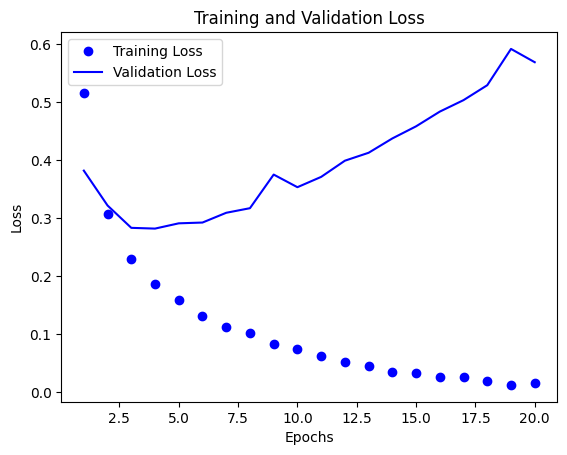

In [18]:
#plotting the training and validation loss
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, 21)

plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

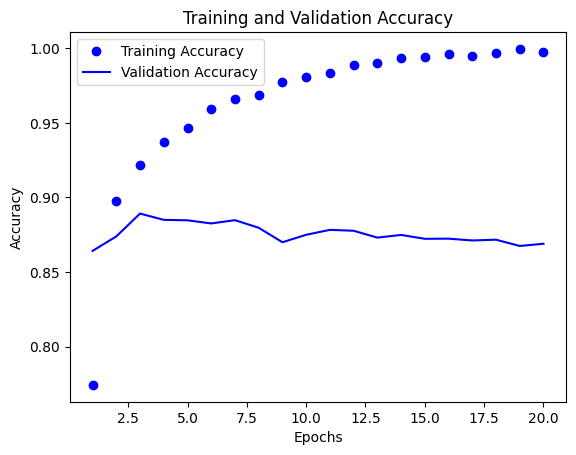

In [19]:
#plotting the training and validation accuracy
plt.clf() #clear figure

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

A model that performs better on the training data isn’t necessarily a model that will do better on data it has never seen before. In precise terms, what you’re seeing is overfitting: after the second epoch, you’re overoptimizing on the training data, and you end up learning representations that are specific to the training data and don’t generalize
to data outside of the training set.

In this case, to prevent overfitting, you could stop training after three epochs.

**Note:** There are better ways to handle overfitting but i am going with one of the most common approach, Early Stopping.

Let’s train a new network from scratch for four epochs and then evaluate it on the test data.

In [23]:
#retraining model from scratch

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy']
             )

model.fit(x_train, y_train,
          epochs=4, batch_size=512
         )

results = model.evaluate(x_test,y_test)

Epoch 1/4
49/49 [==============================] - 5s 36ms/step - loss: 0.4635 - accuracy: 0.8162
Epoch 2/4
49/49 [==============================] - 1s 17ms/step - loss: 0.2740 - accuracy: 0.9022
Epoch 3/4
49/49 [==============================] - 1s 16ms/step - loss: 0.2152 - accuracy: 0.9226
Epoch 4/4
782/782 [==============================] - 3s 2ms/step - loss: 0.3169 - accuracy: 0.8724


In [24]:
results

[0.31687942147254944, 0.8723599910736084]

This fairly naive approach achieves an accuracy of 88%. With state-of-the-art approaches, you should be able to get close to 95%

In [25]:
#using a trained network to generate predictions on new data

model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.13475256],
       [0.99918747],
       [0.56421137],
       ...,
       [0.07328247],
       [0.0435516 ],
       [0.41962302]], dtype=float32)

As you can see, the network is confident for some samples (0.99 or more, or 0.01 or less) but less confident for others (0.6, 0.4)